# YouTube Link 
## https://youtu.be/n-JbzaKiwL4

## Image Classification with Fully Connected Neural Network in Keras: Part: 2
### https://youtu.be/n-JbzaKiwL4

In [1]:

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

batch_size = 128
num_classes = 10
epochs = 12


Using TensorFlow backend.


In [2]:



# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11493376/11490434 [==============================] - 2s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
# input image dimensions
img_rows, img_cols = 28, 28

Corresponding class to the image:  0


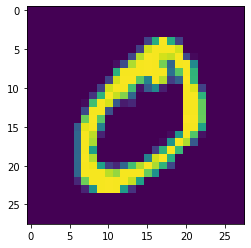

In [5]:
# plot the image
plt.imshow(x_train[1])


print("Corresponding class to the image: ",y_train[1])

In [6]:
x_train = x_train.reshape(x_train.shape[0], img_rows*img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows*img_cols)
input_shape = (img_rows * img_cols)

In [7]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (60000, 784)
60000 train samples
10000 test samples


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [11]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784, )))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
adam = keras.optimizers.Adam(lr=0.0001)

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

In [15]:


model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))



Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 4s 68us/step - loss: 1.0517 - accuracy: 0.7244 - val_loss: 0.3866 - val_accuracy: 0.8976
Epoch 2/12
60000/60000 [==============================] - 2s 40us/step - loss: 0.3298 - accuracy: 0.9094 - val_loss: 0.2711 - val_accuracy: 0.9228
Epoch 3/12
60000/60000 [==============================] - 3s 43us/step - loss: 0.2543 - accuracy: 0.9277 - val_loss: 0.2264 - val_accuracy: 0.9350
Epoch 4/12
60000/60000 [==============================] - 2s 42us/step - loss: 0.2169 - accuracy: 0.9381 - val_loss: 0.1993 - val_accuracy: 0.9429
Epoch 5/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.1924 - accuracy: 0.9445 - val_loss: 0.1819 - val_accuracy: 0.9478
Epoch 6/12
60000/60000 [==============================] - 2s 41us/step - loss: 0.1735 - accuracy: 0.9501 - val_loss: 0.1678 - val_accuracy: 0.9498
Epoch 7/12
60000/60000 [==============================] - 2s 41us/st

In [16]:
model.save('./model.h5')

In [17]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.11633492667153478
Test accuracy: 0.964900016784668


In [18]:
test_data = x_test[0].reshape(1, 784)
test_data.shape

(1, 784)

In [19]:
predict = model.predict(test_data)
predict = np.argmax(predict, axis=1)
predict

array([7])